In [43]:
import csv
import re
from functools import reduce
import numpy as np

def get_data_csv():
    collection = []
    with open('imdb.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

In [71]:
import json
import pandas as pd

df = pd.DataFrame(data)
#removing duplicates
df = df.drop_duplicates()

#removing empty ratings
dfRates = df.loc[df['Rate']!= 'No Rate']
#converting ratings to float and dates to int so that operations can be performed on them
dfRates['Rate'] = dfRates['Rate'].astype(float)
dfRates['Date'] = dfRates['Date'].astype(int)
#gets total number of movies and tv shows
dfRates['Type'].value_counts()

/tmp/ipykernel_11/1698288465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRates['Rate'] = dfRates['Rate'].astype(float)
/tmp/ipykernel_11/1698288465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRates['Date'] = dfRates['Date'].astype(int)


Film      3465
Series    1410
Name: Type, dtype: int64

First we'll start by looking at the total number of films released vs the number of TV series. Looking at this, there are over twice as many films as series. We'll follow this by looking at the average ratings of both films and TV series.

<AxesSubplot:title={'center':'Average Film Ratings vs Series Ratings'}, xlabel='Type', ylabel='Average rating'>

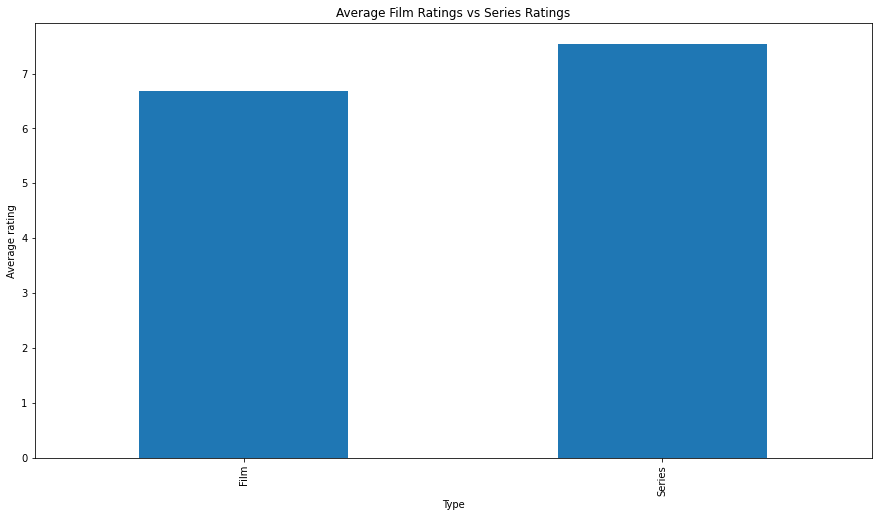

In [86]:
df_pivot = pd.pivot_table(data=dfRates, values='Rate', index=['Type'], aggfunc='mean')
df_pivot.plot(kind='bar', figsize = (15,8), title='Average Film Ratings vs Series Ratings', ylabel='Average rating', legend = {})

Here we can see the average rating for series is slightly higher than films, despite the ratings for series being higher. Next let's look at how these ratings change over time.

In [73]:
dfRates = dfRates.sort_values(by=['Date'], ascending=True)
dfRates

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
3107,Nosferatu,1922,7.9,"92,629","Fantasy, Horror",94,Film,Not Rated,-,None,Mild,None,Mild,Moderate
2945,Metropolis,1927,8.3,"167,247","Drama, Sci-Fi",153,Film,Not Rated,-,Mild,Mild,None,Mild,Moderate
2221,The Wilds,1931,7.3,"13,430","Adventure, Drama, Mystery",None,Series,TV-14,17,Moderate,Mild,Severe,Mild,Mild
2304,Dracula,1931,7.5,"49,504","Drama, Fantasy, Horror",75,Film,Passed,-,None,Mild,None,Mild,Mild
3594,M - Eine Stadt sucht einen Mörder,1931,8.3,"151,051","Crime, Mystery, Thriller",117,Film,Passed,-,None,Mild,Mild,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Stargirl,2022,7.2,"14,256","Action, Adventure, Crime",566,Series,TV-PG,27,None,Moderate,Mild,Mild,None
877,The King of Queens,2022,7.3,"78,594",Comedy,22,Series,TV-PG,207,Mild,None,Mild,Mild,None
4284,Shtisel,2022,8.6,"6,298",Drama,45,Series,TV-14,33,None,None,None,Mild,None
4404,Jonathan Creek,2023,8.1,"7,069","Comedy, Crime, Drama",60,Series,TV-MA,32,Moderate,Moderate,Moderate,No Rate,Mild


Looking at the head and tail, we can see that the data set includes films and series from 1922 to 2023. It doesn't make sense to include the ratings of films and series that haven't been released yet, so we'll filter out all the rows from after 2021 and only looking at the ones from 1922 to 2021. Also, we'll be using line graphs to look at the change of average ratings over time.

<AxesSubplot:title={'center':'Average Film vs Series Ratings per Year'}, xlabel='Date', ylabel='Average Rating'>

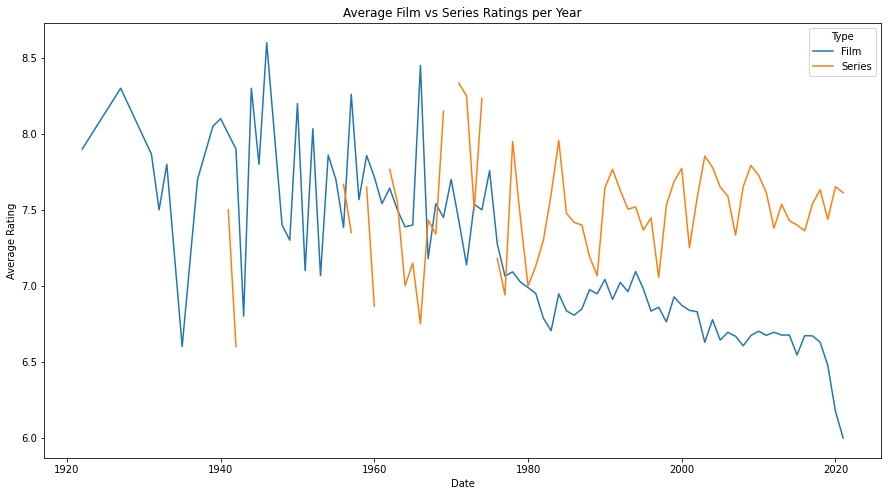

In [82]:
#remove ratings after 2021
dfRates = dfRates.loc[dfRates['Date']<= 2021]
#get pivot table of reviews over time
df_pivot = pd.pivot_table(data=dfRates, values='Rate', index=['Date'], columns=['Type'], aggfunc='mean')
#Generate plot
df_pivot.plot(kind='line', figsize = (15,8), title='Average Film vs Series Ratings per Year', ylabel='Average Rating')

Looking at the average ratings per year, films started either higher than or around where series are, however around the 70s to 80s they began falling off in ratings. As the ratings of films decreased, the ratings of series stayed about the same.

In [83]:
#gets pivot table of best reviews per year
df_pivot = pd.pivot_table(data=dfRates, values='Rate', index=['Date'], columns=['Type'], aggfunc='max')
#Generate plot
df_pivot.plot(kind='line', figsize = (15,8), title='Average Film vs Series Maximum Rating per Year', ylabel='Maximum Rating'))

SyntaxError: unmatched ')' (1256040158.py, line 4)

<AxesSubplot:title={'center':'Average Film vs Series Minimum Rating per Year'}, xlabel='Date', ylabel='Minimum Rating'>

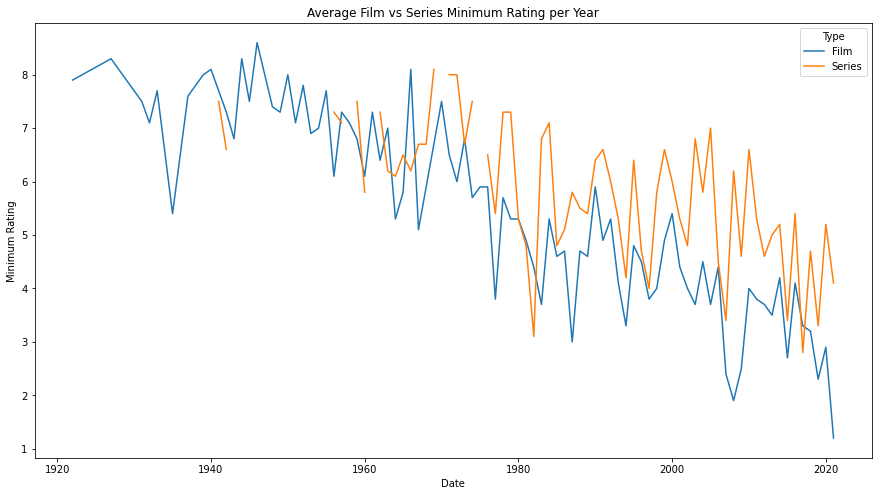

In [81]:
#gets pivot table of worst reviews per year
df_pivot = pd.pivot_table(data=dfRates, values='Rate', index=['Date'], columns=['Type'], aggfunc='min')
#Generate plot
df_pivot.plot(kind='line', figsize = (15,8), title='Average Film vs Series Minimum Rating per Year', ylabel='Minimum Rating')

Looking at the maximum and minimum of the ratings per year, series and films have very similar maxes, however around the 80s, the minimums begin to seperate. The films' minimum is consistently lower than the series minimum after the 80s-90s. Let's look at the number of series and films produced to get a better idea of what happened in this time. The difference between the maximum and minimum ratings increases each year as well.

<AxesSubplot:title={'center':'Total Films vs Series per Year'}, xlabel='Date', ylabel='Maximum Rating'>

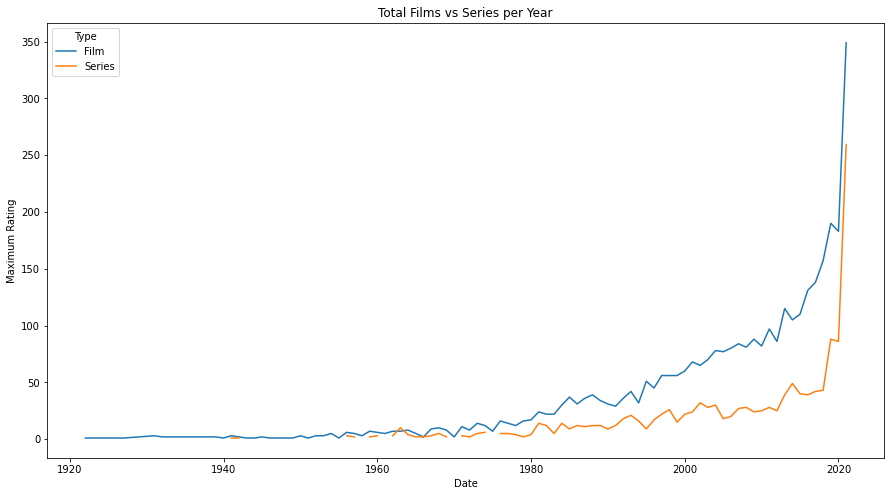

In [85]:
#gets pivot table of total films and series per year
df_pivot = pd.pivot_table(data=dfRates, values='Rate', index=['Date'], columns=['Type'], aggfunc='count')
#Generate plot
df_pivot.plot(kind='line', figsize = (15,8), title='Total Films vs Series per Year', ylabel='Maximum Rating')

 Looking at the number of films vs TV series produced over time shows that there is a noticeable increase in films produced after the 70s to 80s. This aligns with the rest of the data shown, as this was around the time that film ratings started dropping below TV series ratings. This means one likely explanation of the discrepancy between film ratings and series ratings is that there is simply a larger sample size for films than series. This could bring down the average rating due to there being a larger number of more middling performing movies than series. Another interesting thing to note is that TV series were not being produced consistently until the 60s to 70s. It's also possible that the more frequent production of series was what caused a decline in film ratings. This seems less likely than a sampling size difference however.